In [163]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [164]:
objects =  tf.keras.datasets.mnist
# splitting datasets into training and test images
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

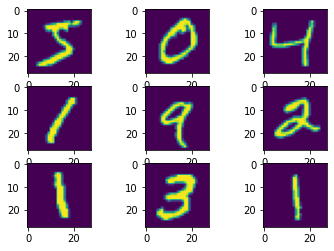

In [165]:
#showing first 9 images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [182]:
# viewing the shape of the data 
print(training_images.shape)
# print(training_images[0])

(60000, 28, 28)


In [167]:
# we can normalize the data by dividing all values by 255  that means scaling the data to a value between 0 and 1 so we can train faster
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [168]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [169]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [170]:
# training with epochs = 5 wgich specificies number of iterations
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9866


In [171]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0748 - accuracy: 0.9762
[0.07481116056442261, 0.9761999845504761]


In [172]:
# to show a visual test

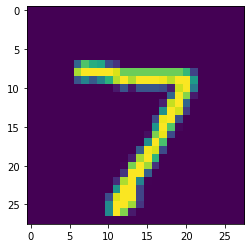

In [173]:
plt.imshow(test_images[0]) 
# showing what the first image in the test dataset looks like 


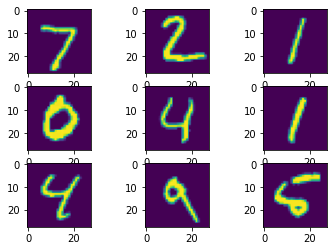

In [174]:
#showing first 9 images of test dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(test_images[i])

In [175]:

# showing our model predicts correctly
prediction=model.predict(test_images)

# showing if we predicted them correctly
for i in range(9):

	print(np.argmax(prediction[i]))
    

7
2
1
0
4
1
4
9
5


In [179]:
import cv2
import numpy as np

image_read = cv2.imread('7.png',0) 
original_image = np.asarray(image_read)
width , height = 28, 28
resize_image = np.zeros(shape=(width,height))

for W in range(width):
    for H in range(height):
        new_width = int( W * original_image.shape[0] / width )
        new_height = int( H * original_image.shape[1] / height )
        resize_image[W][H] = original_image[new_width][new_height]
x = resize_image.reshape(1, 28, 28, 1)
print("Resized image size : " , resize_image.shape)



Resized image size :  (28, 28)


In [180]:
out = model.predict(x)
print(np.argmax(out))

7


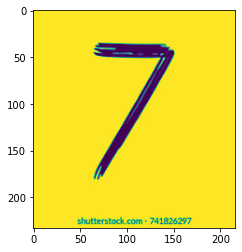

In [181]:
plt.imshow(image_read)

In [ ]:
7.png